In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore') 
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize


# Read Data

In [2]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [3]:
train.describe(include="all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [4]:
train.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
169,170,0,3,"Ling, Mr. Lee",male,28.0,0,0,1601,56.4958,NaN,S
396,397,0,3,"Olsson, Miss. Elina",female,31.0,0,0,350407,7.8542,NaN,S
496,497,1,1,"Eustis, Miss. Elizabeth Mussey",female,54.0,1,0,36947,78.2667,D20,C
224,225,1,1,"Hoyt, Mr. Frederick Maxfield",male,38.0,1,0,19943,90.0000,C93,S
708,709,1,1,"Cleaver, Miss. Alice",female,22.0,0,0,113781,151.5500,NaN,S


In [5]:
train.describe(include = "all")

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [6]:
print(pd.isnull(train).sum())

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


# Data Visualization

Sex
female    314
male      577
Name: Survived, dtype: int64


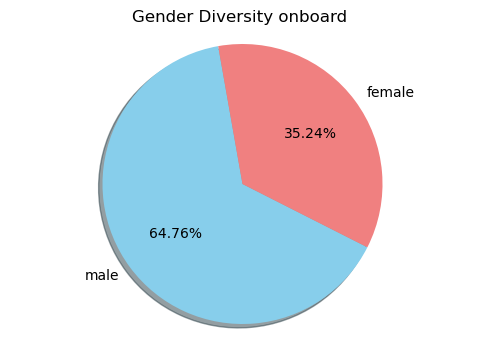

In [7]:
data_sex = train.groupby('Sex')['Survived'].count()
print(data_sex)
dict_sex = {
    'male' : data_sex['male'],
    'female' : data_sex['female']}

colors = ['skyblue', 'lightcoral']

plt.figure(figsize = (6,4))
plt.pie((dict_sex['male'],dict_sex['female']),colors=colors,labels = ('male','female'),autopct='%1.2f%%', startangle=100, shadow=True)

plt.title('Gender Diversity onboard ')


plt.axis('equal')
plt.show()

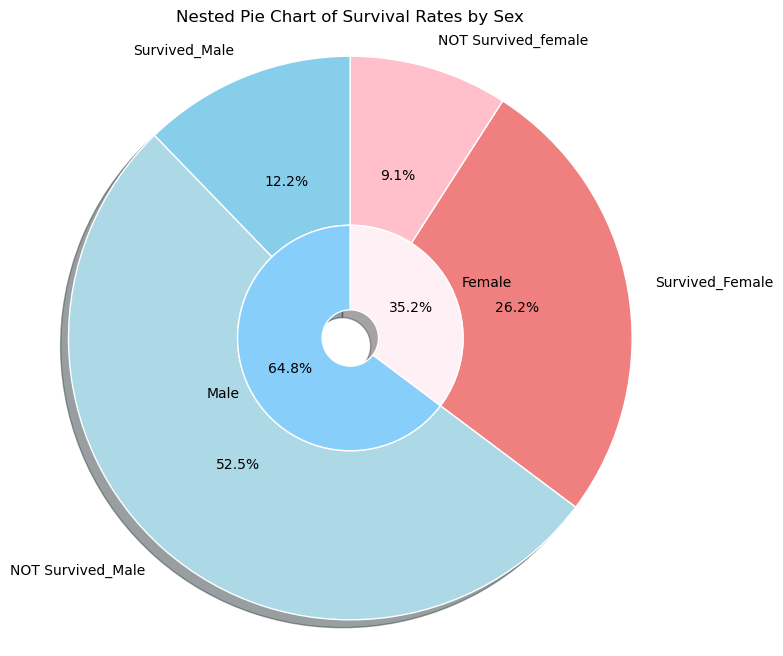

In [8]:
k = train.groupby('Sex')['Survived'].sum()

live_female = k['female']
not_survived_female = dict_sex['female'] - live_female

live_male = k['male']
not_survived_male = dict_sex['male'] - live_male


inner_pie = dict_sex['male'],dict_sex['female']
inner_label = ['Male','Female']
inner_color = ['lightskyblue', 'lavenderblush']

outer_pie = [live_male,not_survived_male,live_female,not_survived_female]
outer_label =['Survived_Male','NOT Survived_Male', 'Survived_Female','NOT Survived_female']
outer_color = ['skyblue', 'lightblue', 'lightcoral', 'pink']


fig, ax = plt.subplots(figsize=(8, 8))


ax.pie(outer_pie,radius = 1, labels=outer_label,colors = outer_color, autopct = '%1.1f%%',shadow = True, startangle = 90, wedgeprops = dict(width = 0.6,edgecolor = 'w'))

ax.pie(inner_pie, radius = 0.4, labels = inner_label, colors = inner_color, autopct = '%1.1f%%',shadow = True, startangle = 90, wedgeprops = dict(width = 0.3, edgecolor= 'w'))



plt.title('Nested Pie Chart of Survival Rates by Sex')
plt.axis('equal') 
plt.show()


Percentage of females who survived: 74.20382165605095
Percentage of males who survived: 18.890814558058924


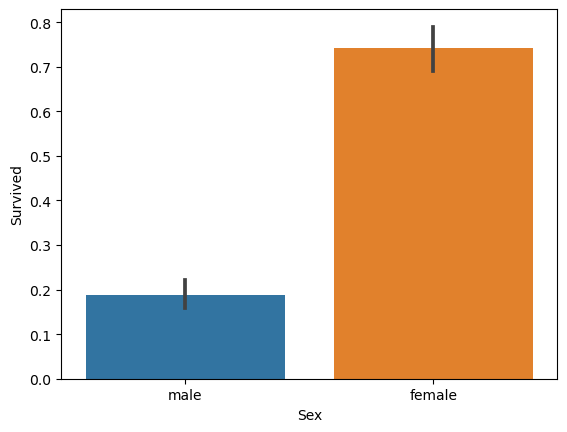

In [9]:
sns.barplot(x="Sex", y="Survived", data=train)


print("Percentage of females who survived:", train["Survived"][train["Sex"] == 'female'].value_counts(normalize = True)[1]*100)

print("Percentage of males who survived:", train["Survived"][train["Sex"] == 'male'].value_counts(normalize = True)[1]*100)

Percentage of Pclass = 1 who survived: 62.96296296296296
Percentage of Pclass = 2 who survived: 47.28260869565217
Percentage of Pclass = 3 who survived: 24.236252545824847


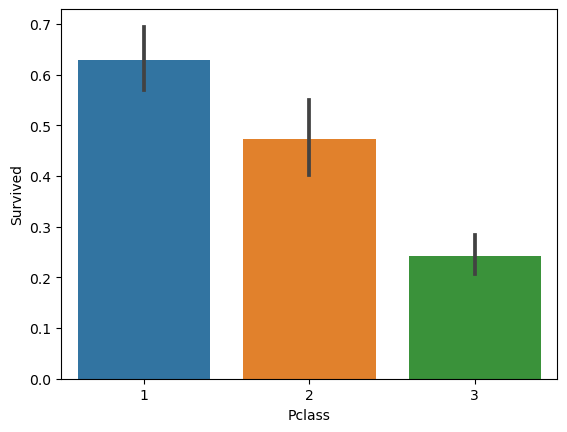

In [10]:
sns.barplot(x="Pclass", y="Survived", data=train)


print("Percentage of Pclass = 1 who survived:", train["Survived"][train["Pclass"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 2 who survived:", train["Survived"][train["Pclass"] == 2].value_counts(normalize = True)[1]*100)

print("Percentage of Pclass = 3 who survived:", train["Survived"][train["Pclass"] == 3].value_counts(normalize = True)[1]*100)

Percentage of SibSp = 0 who survived: 34.53947368421053
Percentage of SibSp = 1 who survived: 53.588516746411486
Percentage of SibSp = 2 who survived: 46.42857142857143


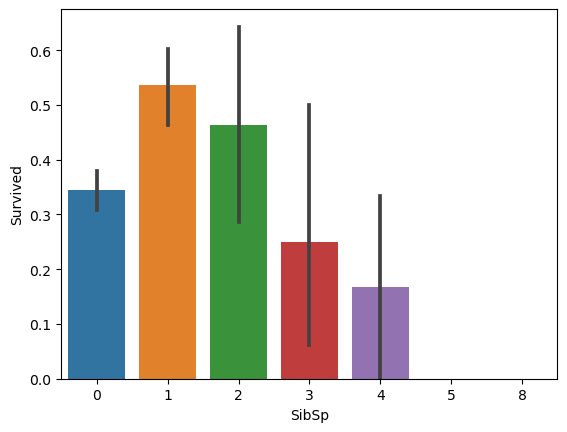

In [11]:
sns.barplot(x="SibSp", y="Survived", data=train)


print("Percentage of SibSp = 0 who survived:", train["Survived"][train["SibSp"] == 0].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 1 who survived:", train["Survived"][train["SibSp"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of SibSp = 2 who survived:", train["Survived"][train["SibSp"] == 2].value_counts(normalize = True)[1]*100)

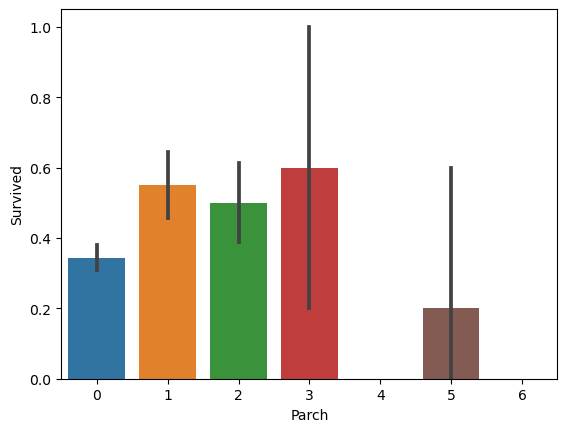

In [12]:
sns.barplot(x="Parch", y="Survived", data=train)
plt.show()

<Figure size 600x800 with 0 Axes>

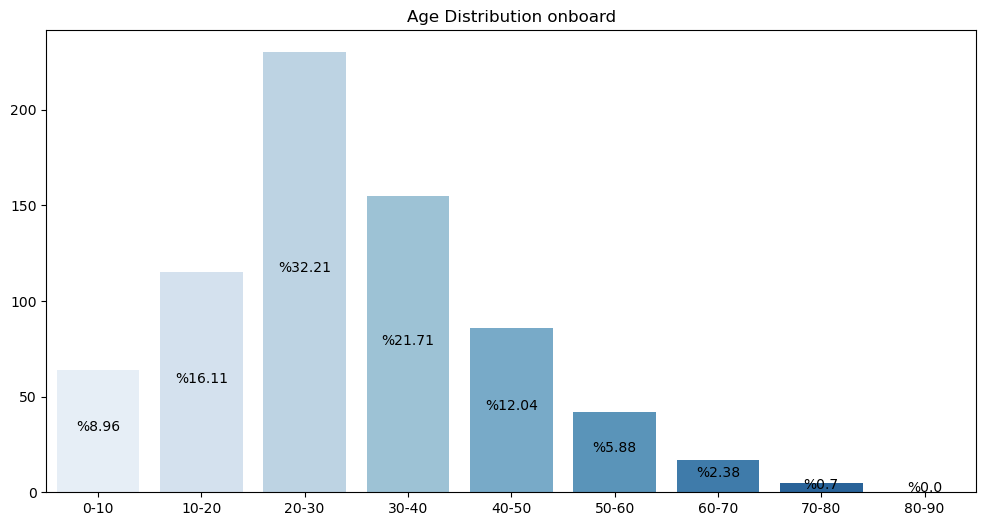

<Figure size 600x800 with 0 Axes>

In [13]:

age = train['Age']
age_total_counter = []
age_label=[]

for i in range (0,int(max(age)+10),10):
   
    statement = (train['Age'] > i) & (train['Age'] <= i + 10)
    age_class = train[statement]['Age'].count()
    age_total_counter.append(age_class)
    age_label.append(f"{i}-{i + 10}")

total_number = np.sum(age_total_counter)
percentage_list = []
for each in age_total_counter:
    percentage_list.append('%'+str(round((each*100/total_number), 2)))
    
    

plt.figure(figsize=(12, 6))


sns.barplot(x=age_label, y=age_total_counter, palette='Blues')
    
for i in range(len(percentage_list)):
        plt.text(i, age_total_counter[i]//2, percentage_list[i], ha = 'center')    
    
plt.title('Age Distribution onboard')             
plt.figure(figsize = (6,8))

<Figure size 600x800 with 0 Axes>

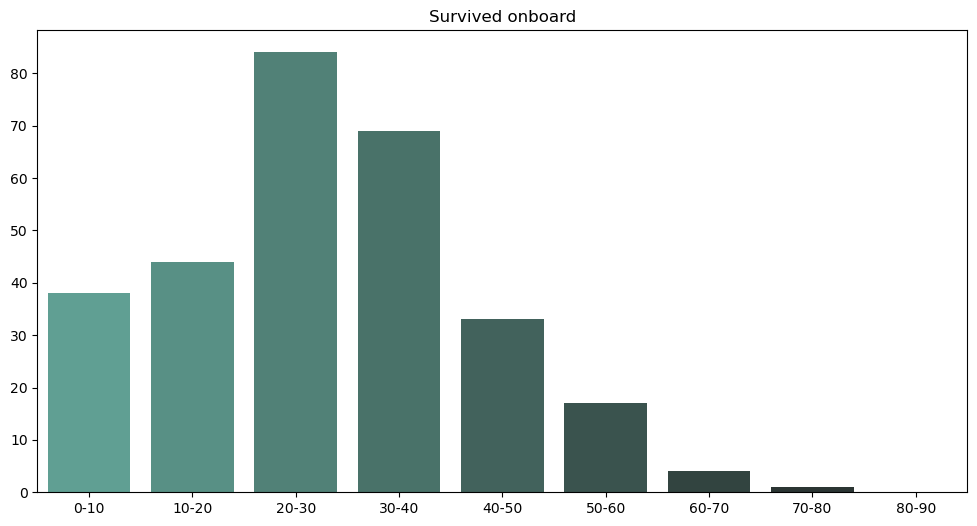

<Figure size 600x800 with 0 Axes>

In [14]:

max_age = int(max(train['Age']))
k = train.groupby('Age')['Survived'].sum().reset_index()
survived_age = []

for i in range (0,max_age+10,10):
    
    statement = (k['Age'] > i) & (k['Age'] <= i + 10)
    age_class = k[statement].groupby('Age')['Survived'].sum()
    survived_age.append(np.sum(age_class))
    

plt.figure(figsize=(12, 6))


sns.barplot(x=age_label, y=survived_age, palette='dark:#5A9_r')   
    
plt.title('Survived onboard')             
plt.figure(figsize = (6,8))

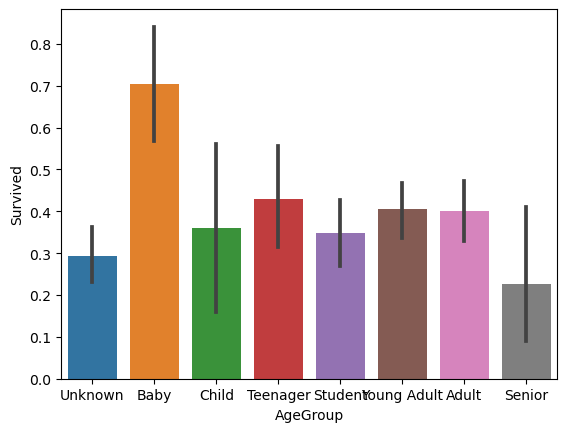

In [15]:
train["Age"] = train["Age"].fillna(-0.5)
test["Age"] = test["Age"].fillna(-0.5)
bins = [-1, 0, 5, 12, 18, 24, 35, 60, np.inf]
labels = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Senior']
train['AgeGroup'] = pd.cut(train["Age"], bins, labels = labels)
test['AgeGroup'] = pd.cut(test["Age"], bins, labels = labels)


sns.barplot(x="AgeGroup", y="Survived", data=train)
plt.show()

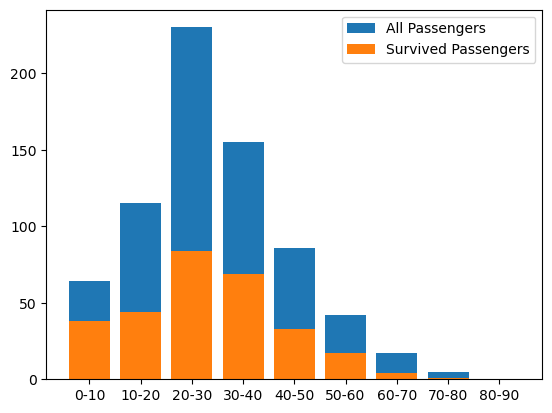

In [16]:
all_age_data = age_total_counter
survived_age_data = survived_age
x_label = age_label

plt.bar(x_label,all_age_data,label = 'All Passengers')
plt.bar(x_label,survived_age_data,label = 'Survived Passengers')

plt.legend() 
plt.show() 

Percentage of CabinBool = 1 who survived: 66.66666666666666
Percentage of CabinBool = 0 who survived: 29.985443959243085


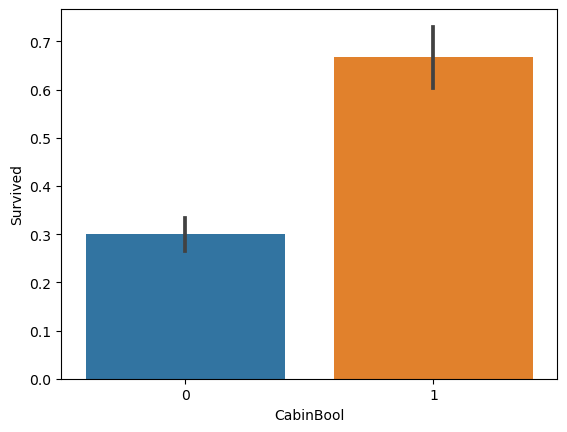

In [17]:
train["CabinBool"] = (train["Cabin"].notnull().astype('int'))
test["CabinBool"] = (test["Cabin"].notnull().astype('int'))


print("Percentage of CabinBool = 1 who survived:", train["Survived"][train["CabinBool"] == 1].value_counts(normalize = True)[1]*100)

print("Percentage of CabinBool = 0 who survived:", train["Survived"][train["CabinBool"] == 0].value_counts(normalize = True)[1]*100)

sns.barplot(x="CabinBool", y="Survived", data=train)
plt.show()

# Feature Engineering

<Axes: >

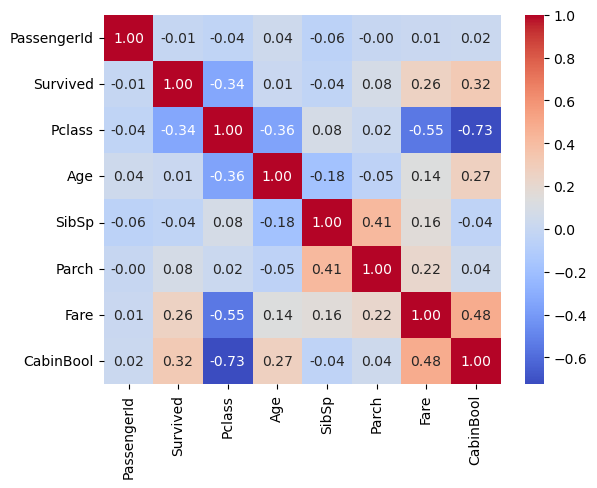

In [18]:
corr = train.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm")

# Data Cleaning

In [19]:
test.describe(include="all")

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup,CabinBool
count,418.000000,418.000000,418,418,418.000000,418.000000,418.000000,418,417.000000,91,418,418,418.000000
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3,8,NaN
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S,Young Adult,NaN
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270,96,NaN
mean,1100.500000,2.265550,NaN,NaN,23.941388,0.447368,0.392344,NaN,35.627188,NaN,NaN,NaN,0.217703
std,120.810458,0.841838,NaN,NaN,17.741080,0.896760,0.981429,NaN,55.907576,NaN,NaN,NaN,0.413179
min,892.000000,1.000000,NaN,NaN,-0.500000,0.000000,0.000000,NaN,0.000000,NaN,NaN,NaN,0.000000
25%,996.250000,1.000000,NaN,NaN,9.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN,NaN,0.000000
50%,1100.500000,3.000000,NaN,NaN,24.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN,NaN,0.000000
75%,1204.750000,3.000000,NaN,NaN,35.750000,1.000000,0.000000,NaN,31.500000,NaN,NaN,NaN,0.000000


In [20]:
train = train.drop(['Cabin'], axis = 1)
test = test.drop(['Cabin'], axis = 1)

In [21]:
train = train.drop(['Ticket'], axis = 1)
test = test.drop(['Ticket'], axis = 1)

In [22]:
print("Number of people embarking in Southampton (S):")
southampton = train[train["Embarked"] == "S"].shape[0]
print(southampton)

print("Number of people embarking in Cherbourg (C):")
cherbourg = train[train["Embarked"] == "C"].shape[0]
print(cherbourg)

print("Number of people embarking in Queenstown (Q):")
queenstown = train[train["Embarked"] == "Q"].shape[0]
print(queenstown)

Number of people embarking in Southampton (S):
644
Number of people embarking in Cherbourg (C):
168
Number of people embarking in Queenstown (Q):
77


In [23]:
train = train.fillna({"Embarked": "S"})

In [24]:
combine = [train, test]


for dataset in combine:
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(train['Title'], train['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [25]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Capt', 'Col',
    'Don', 'Dr', 'Major', 'Rev', 'Jonkheer', 'Dona'], 'Rare')
    
    dataset['Title'] = dataset['Title'].replace(['Countess', 'Lady', 'Sir'], 'Royal')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

train[['Title', 'Survived']].groupby(['Title'], as_index=False).mean()

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.285714
5,Royal,1.000000


In [26]:
title_mapping = {"Mr": 1, "Miss": 2, "Mrs": 3, "Master": 4, "Royal": 5, "Rare": 6}
for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)

train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,7.2500,S,Student,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,71.2833,C,Adult,1,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,7.9250,S,Young Adult,0,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,53.1000,S,Young Adult,1,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,8.0500,S,Young Adult,0,1


In [27]:
mr_age = train[train["Title"] == 1]["AgeGroup"].mode() #Young Adult

miss_age = train[train["Title"] == 2]["AgeGroup"].mode() #Student

mrs_age = train[train["Title"] == 3]["AgeGroup"].mode() #Adult

master_age = train[train["Title"] == 4]["AgeGroup"].mode() #Baby

royal_age = train[train["Title"] == 5]["AgeGroup"].mode() #Adult

rare_age = train[train["Title"] == 6]["AgeGroup"].mode() #Adult

age_title_mapping = {1: "Young Adult", 2: "Student", 3: "Adult", 4: "Baby", 5: "Adult", 6: "Adult"}



for x in range(len(train["AgeGroup"])):
    if train["AgeGroup"][x] == "Unknown":
        train["AgeGroup"][x] = age_title_mapping[train["Title"][x]]
        
for x in range(len(test["AgeGroup"])):
    if test["AgeGroup"][x] == "Unknown":
        test["AgeGroup"][x] = age_title_mapping[test["Title"][x]]

In [28]:
age_mapping = {'Baby': 1, 'Child': 2, 'Teenager': 3, 'Student': 4, 'Young Adult': 5, 'Adult': 6, 'Senior': 7}
train['AgeGroup'] = train['AgeGroup'].map(age_mapping)
test['AgeGroup'] = test['AgeGroup'].map(age_mapping)

train.head()


train = train.drop(['Age'], axis = 1)
test = test.drop(['Age'], axis = 1)

In [29]:
train = train.drop(['Name'], axis = 1)
test = test.drop(['Name'], axis = 1)

In [30]:
sex_mapping = {"male": 0, "female": 1}
train['Sex'] = train['Sex'].map(sex_mapping)
test['Sex'] = test['Sex'].map(sex_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,S,4.0,0,1
1,2,1,1,1,1,0,71.2833,C,6.0,1,3
2,3,1,3,1,0,0,7.9250,S,5.0,0,2
3,4,1,1,1,1,0,53.1000,S,5.0,1,3
4,5,0,3,0,0,0,8.0500,S,5.0,0,1


In [31]:
embarked_mapping = {"S": 1, "C": 2, "Q": 3}
train['Embarked'] = train['Embarked'].map(embarked_mapping)
test['Embarked'] = test['Embarked'].map(embarked_mapping)

train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Fare,Embarked,AgeGroup,CabinBool,Title
0,1,0,3,0,1,0,7.2500,1,4.0,0,1
1,2,1,1,1,1,0,71.2833,2,6.0,1,3
2,3,1,3,1,0,0,7.9250,1,5.0,0,2
3,4,1,1,1,1,0,53.1000,1,5.0,1,3
4,5,0,3,0,0,0,8.0500,1,5.0,0,1


In [32]:
for x in range(len(test["Fare"])):
    if pd.isnull(test["Fare"][x]):
        pclass = test["Pclass"][x] 
        test["Fare"][x] = round(train[train["Pclass"] == pclass]["Fare"].mean(), 4)
        

train['FareBand'] = pd.qcut(train['Fare'], 4, labels = [1, 2, 3, 4])
test['FareBand'] = pd.qcut(test['Fare'], 4, labels = [1, 2, 3, 4])


train = train.drop(['Fare'], axis = 1)
test = test.drop(['Fare'], axis = 1)

In [33]:
train.head()

,PassengerId,Survived,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,1,0,3,0,1,0,1,4.0,0,1,1
1,2,1,1,1,1,0,2,6.0,1,3,4
2,3,1,3,1,0,0,1,5.0,0,2,2
3,4,1,1,1,1,0,1,5.0,1,3,4
4,5,0,3,0,0,0,1,5.0,0,1,2


In [34]:
test.head()

,PassengerId,Pclass,Sex,SibSp,Parch,Embarked,AgeGroup,CabinBool,Title,FareBand
0,892,3,0,0,0,3,5.0,0,1,1
1,893,3,1,1,0,1,6.0,0,3,1
2,894,2,0,0,0,3,7.0,0,1,2
3,895,3,0,0,0,1,5.0,0,1,2
4,896,3,1,1,1,1,4.0,0,3,2


# Choosing Model

In [35]:
from sklearn.model_selection import train_test_split

predictors = train.drop(['Survived', 'PassengerId'], axis=1)
target = train["Survived"]
x_train, x_val, y_train, y_val = train_test_split(predictors, target, test_size = 0.22, random_state = 0)

In [36]:
# Gaussian Naive Bayes

from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score

gaussian = GaussianNB()
gaussian.fit(x_train, y_train)
y_pred = gaussian.predict(x_val)
acc_gaussian = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gaussian)

78.68


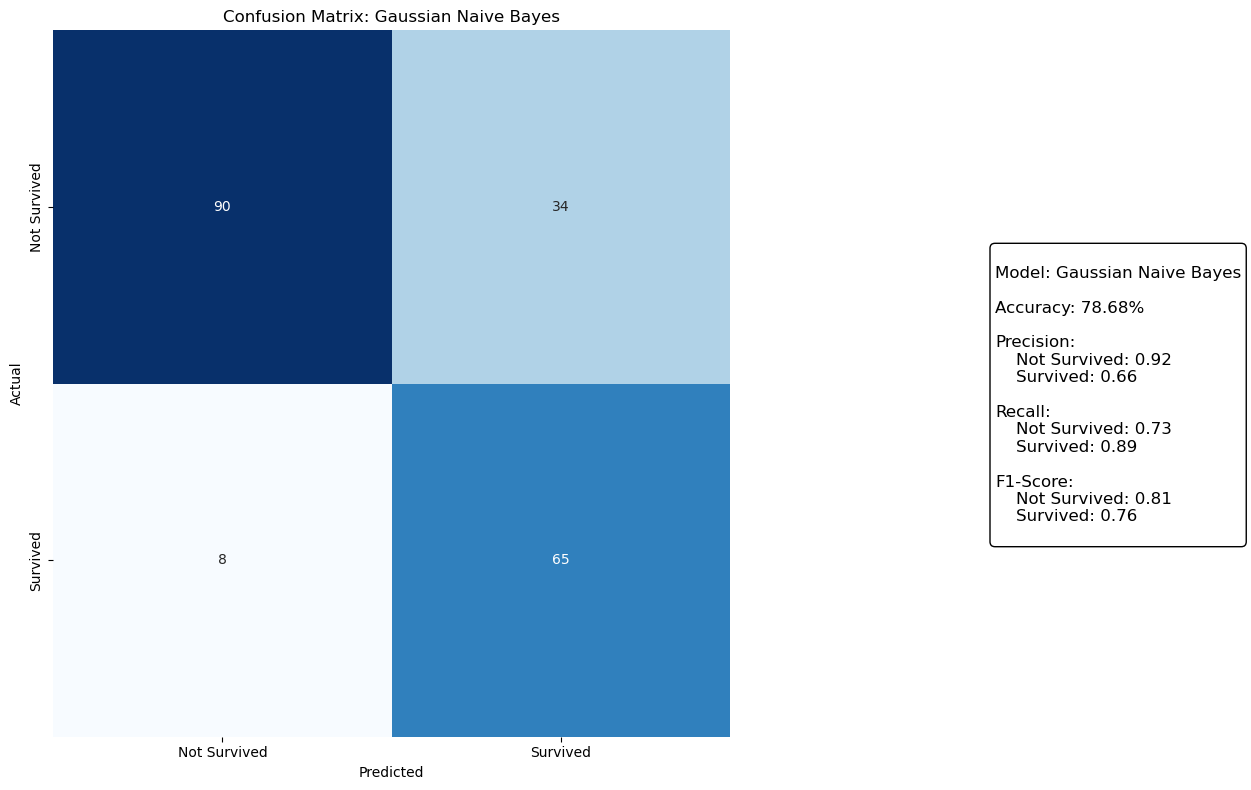

In [37]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]

accuracy = accuracy_score(y_val, y_pred)  
report_gaussian = classification_report(y_val, y_pred, target_names=labels, output_dict=True)

accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: Gaussian Naive Bayes")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: Gaussian Naive Bayes

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_gaussian['Not Survived']['precision']:.2f}
    Survived: {report_gaussian['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_gaussian['Not Survived']['recall']:.2f}
    Survived: {report_gaussian['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_gaussian['Not Survived']['f1-score']:.2f}
    Survived: {report_gaussian['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.show()


In [38]:
# Logistic Regression

from sklearn.linear_model import LogisticRegression

logreg = LogisticRegression()
logreg.fit(x_train, y_train)
y_pred = logreg.predict(x_val)
acc_logreg = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_logreg)

79.7


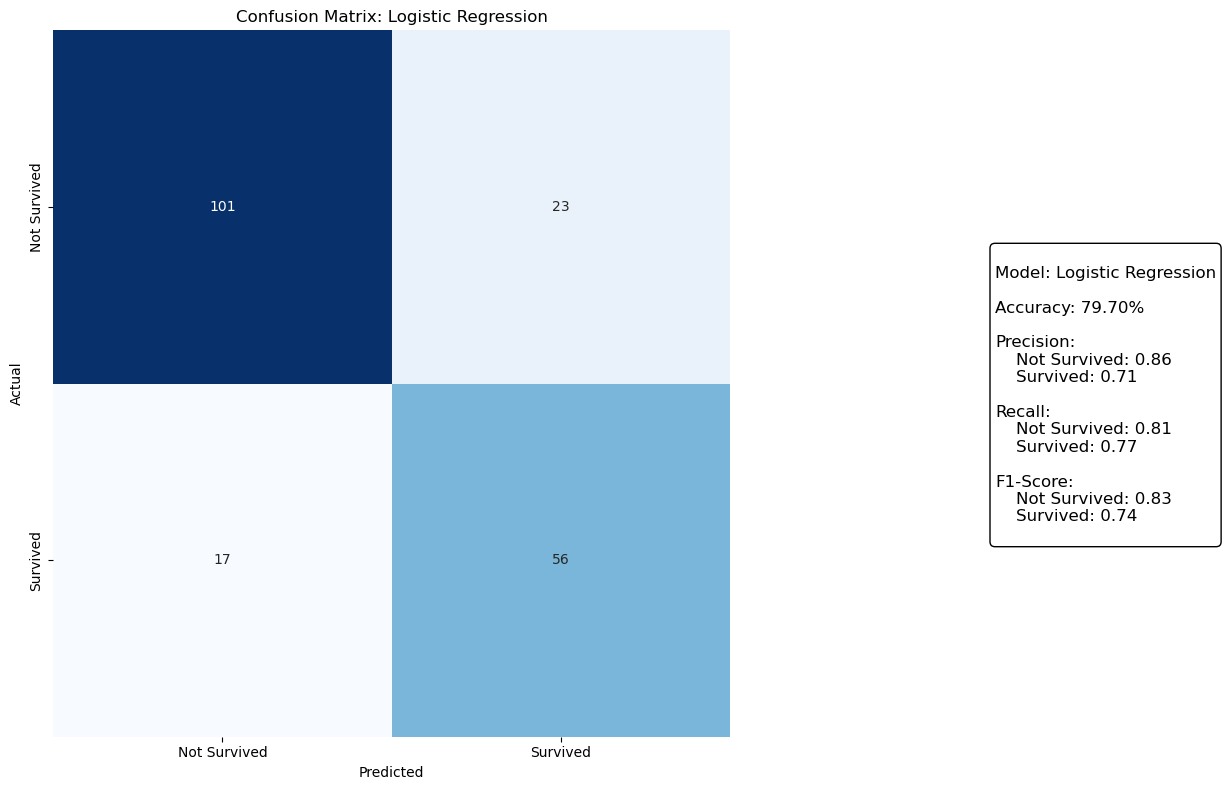

In [39]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]

accuracy = accuracy_score(y_val, y_pred)
report_logreg = classification_report(y_val, y_pred, target_names=labels, output_dict=True)

accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: Logistic Regression")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: Logistic Regression

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_logreg['Not Survived']['precision']:.2f}
    Survived: {report_logreg['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_logreg['Not Survived']['recall']:.2f}
    Survived: {report_logreg['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_logreg['Not Survived']['f1-score']:.2f}
    Survived: {report_logreg['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 


In [40]:
# Support Vector Machines

from sklearn.svm import SVC

svc = SVC()
svc.fit(x_train, y_train)
y_pred = svc.predict(x_val)
acc_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_svc)

82.74


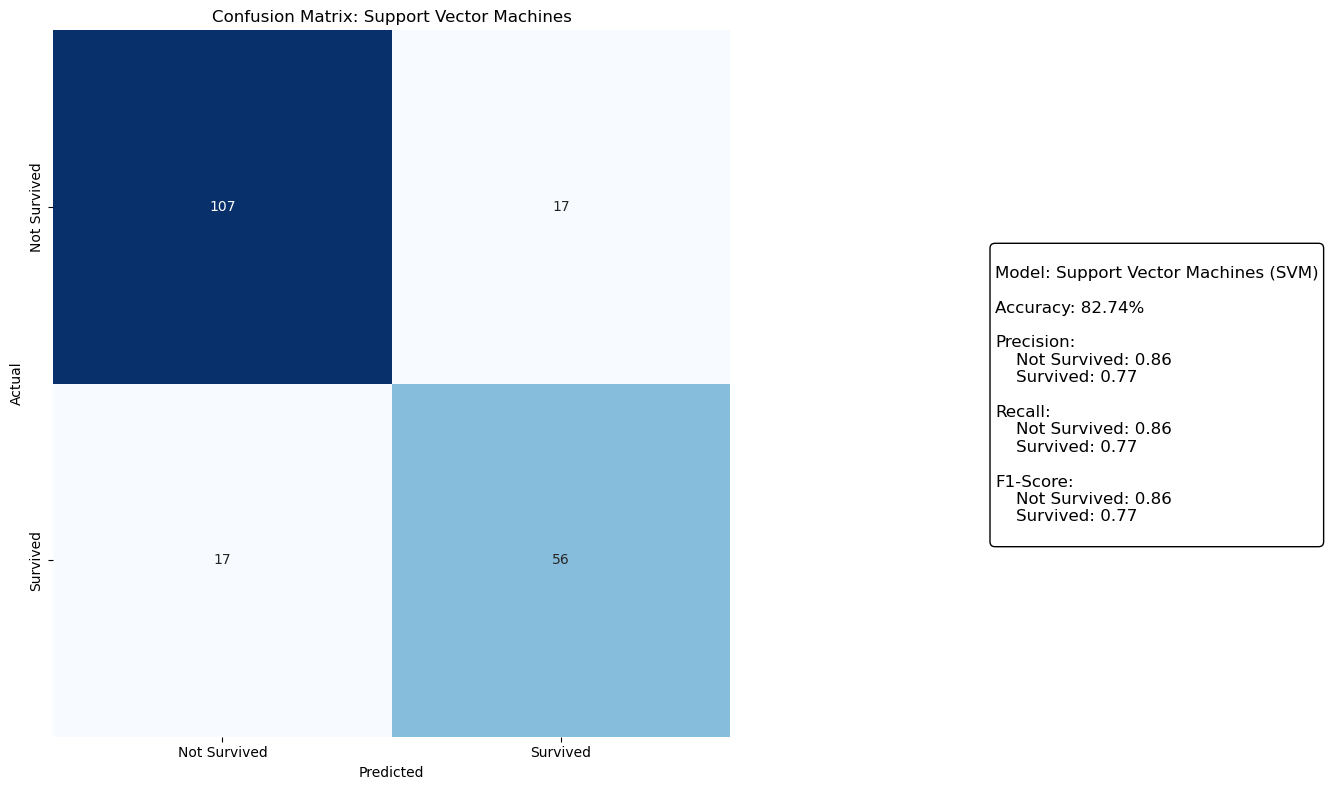

In [41]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]


accuracy = accuracy_score(y_val, y_pred)  
report_svc = classification_report(y_val, y_pred, target_names=labels, output_dict=True)

accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: Support Vector Machines")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: Support Vector Machines (SVM)

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_svc['Not Survived']['precision']:.2f}
    Survived: {report_svc['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_svc['Not Survived']['recall']:.2f}
    Survived: {report_svc['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_svc['Not Survived']['f1-score']:.2f}
    Survived: {report_svc['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.show()


In [42]:
# Linear SVC

from sklearn.svm import LinearSVC

linear_svc = LinearSVC()
linear_svc.fit(x_train, y_train)
y_pred = linear_svc.predict(x_val)
acc_linear_svc = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_linear_svc)

78.68


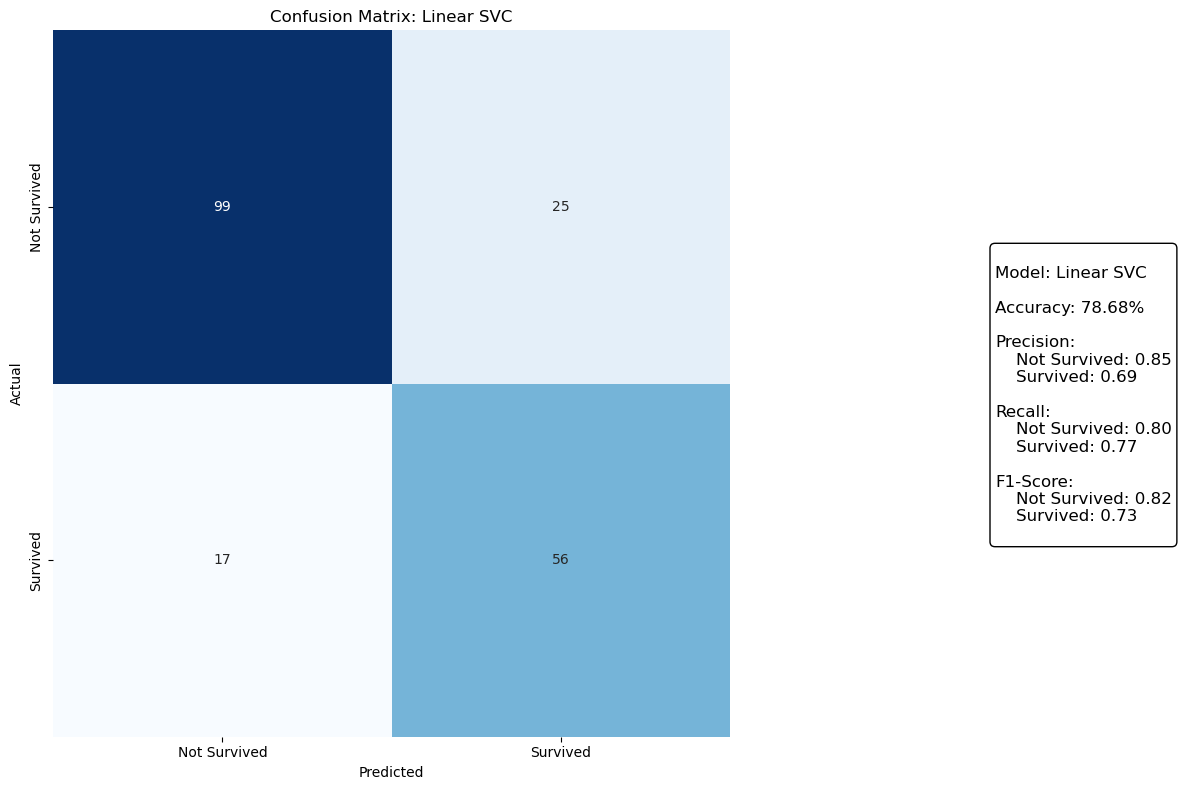

In [43]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]


accuracy = accuracy_score(y_val, y_pred) 
report_linear_svc = classification_report(y_val, y_pred, target_names=labels, output_dict=True)


accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: Linear SVC")
plt.xlabel("Predicted")
plt.ylabel("Actual")

metrics_text = f"""
Model: Linear SVC

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_linear_svc['Not Survived']['precision']:.2f}
    Survived: {report_linear_svc['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_linear_svc['Not Survived']['recall']:.2f}
    Survived: {report_linear_svc['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_linear_svc['Not Survived']['f1-score']:.2f}
    Survived: {report_linear_svc['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.show()

In [44]:
# Perceptron

from sklearn.linear_model import Perceptron

perceptron = Perceptron()
perceptron.fit(x_train, y_train)
y_pred = perceptron.predict(x_val)
acc_perceptron = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_perceptron)

78.68


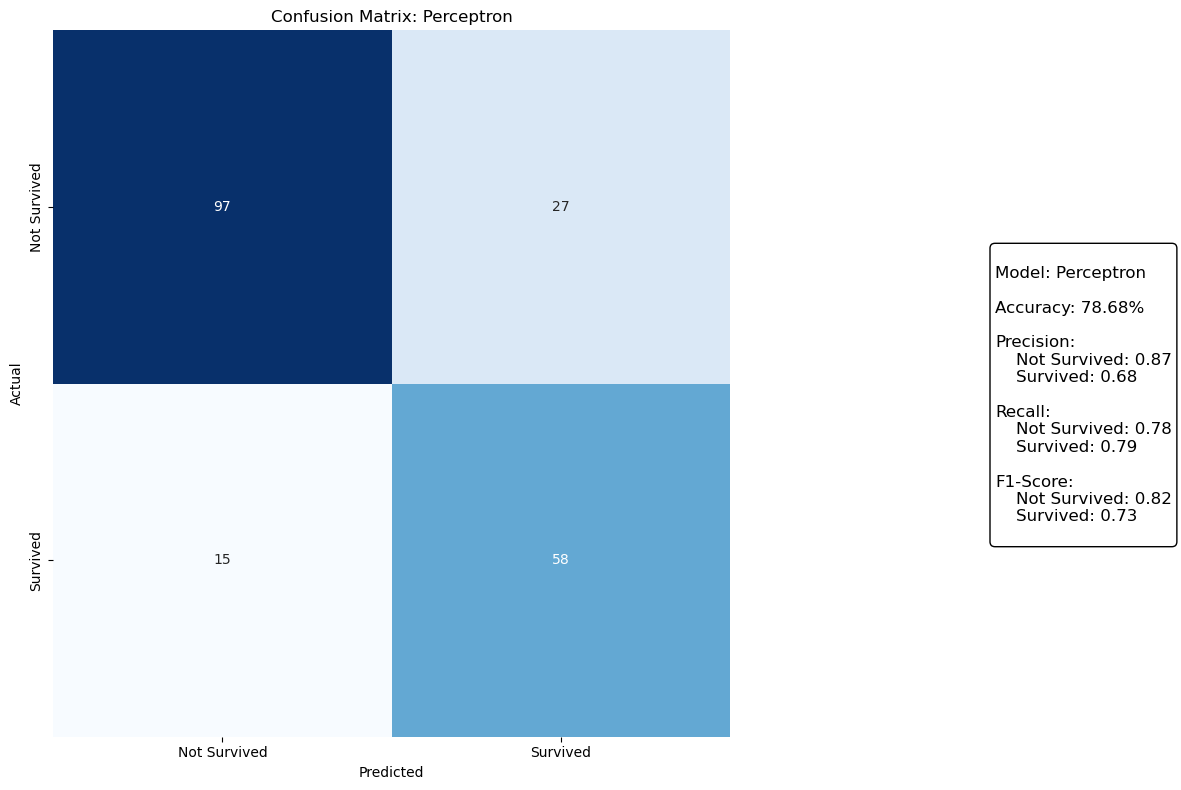

In [45]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]


accuracy = accuracy_score(y_val, y_pred)
report_perceptron = classification_report(y_val, y_pred, target_names=labels, output_dict=True)


accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: Perceptron")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: Perceptron

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_perceptron['Not Survived']['precision']:.2f}
    Survived: {report_perceptron['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_perceptron['Not Survived']['recall']:.2f}
    Survived: {report_perceptron['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_perceptron['Not Survived']['f1-score']:.2f}
    Survived: {report_perceptron['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.show()

In [46]:
#Decision Tree

from sklearn.tree import DecisionTreeClassifier

decisiontree = DecisionTreeClassifier()
decisiontree.fit(x_train, y_train)
y_pred = decisiontree.predict(x_val)
acc_decisiontree = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_decisiontree)

80.71


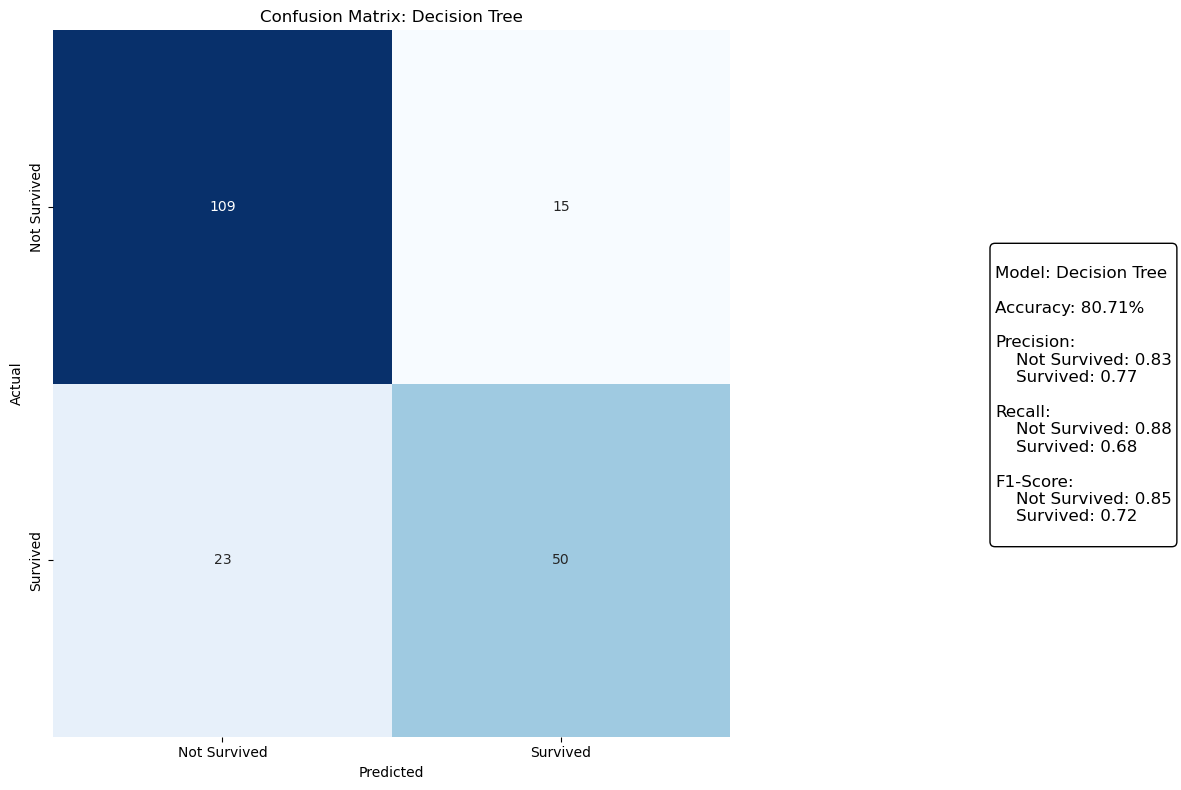

In [47]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]


accuracy = accuracy_score(y_val, y_pred)  
report_decisiontree = classification_report(y_val, y_pred, target_names=labels, output_dict=True)


accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: Decision Tree")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: Decision Tree

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_decisiontree['Not Survived']['precision']:.2f}
    Survived: {report_decisiontree['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_decisiontree['Not Survived']['recall']:.2f}
    Survived: {report_decisiontree['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_decisiontree['Not Survived']['f1-score']:.2f}
    Survived: {report_decisiontree['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.show()


In [48]:
# Random Forest

from sklearn.ensemble import RandomForestClassifier

randomforest = RandomForestClassifier()
randomforest.fit(x_train, y_train)
y_pred = randomforest.predict(x_val)
acc_randomforest = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_randomforest)

84.26


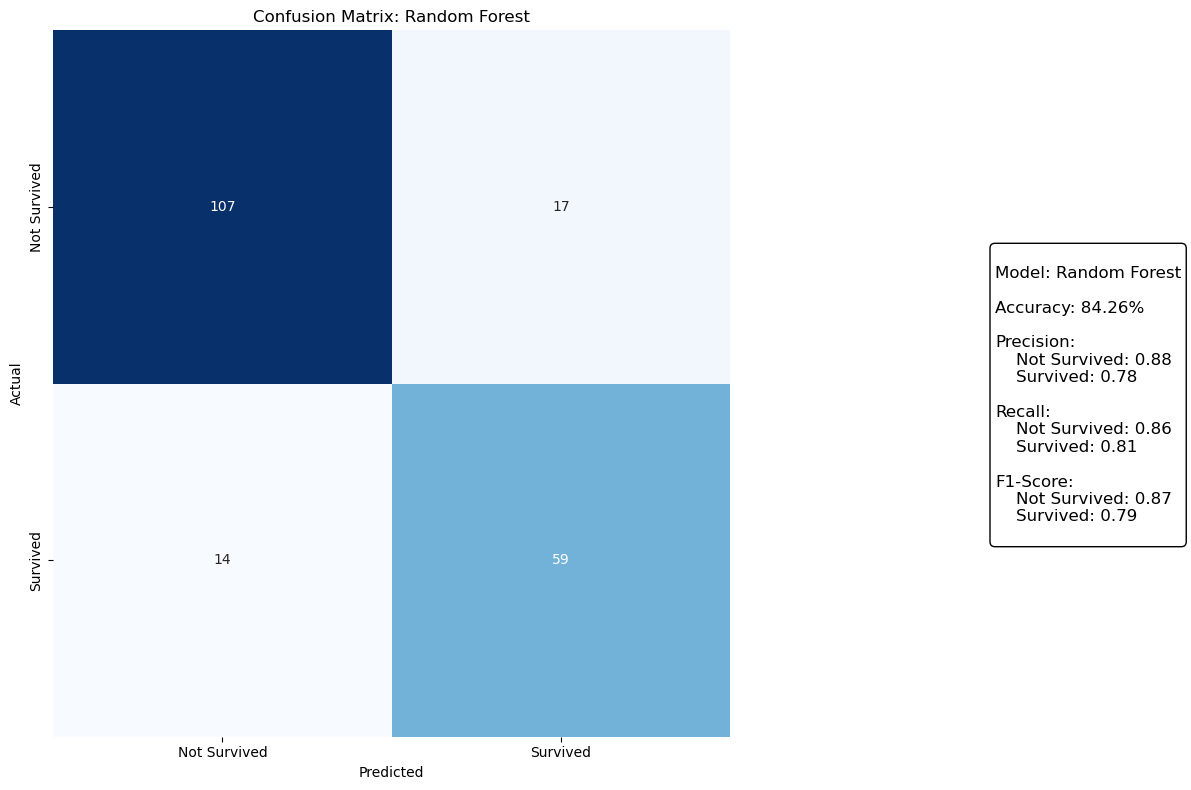

In [49]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]


accuracy = accuracy_score(y_val, y_pred) 
report_randomforest = classification_report(y_val, y_pred, target_names=labels, output_dict=True)

accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: Random Forest

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_randomforest['Not Survived']['precision']:.2f}
    Survived: {report_randomforest['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_randomforest['Not Survived']['recall']:.2f}
    Survived: {report_randomforest['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_randomforest['Not Survived']['f1-score']:.2f}
    Survived: {report_randomforest['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.show()


In [50]:
# KNN or k-Nearest Neighbors

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier()
knn.fit(x_train, y_train)
y_pred = knn.predict(x_val)
acc_knn = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_knn)

82.74


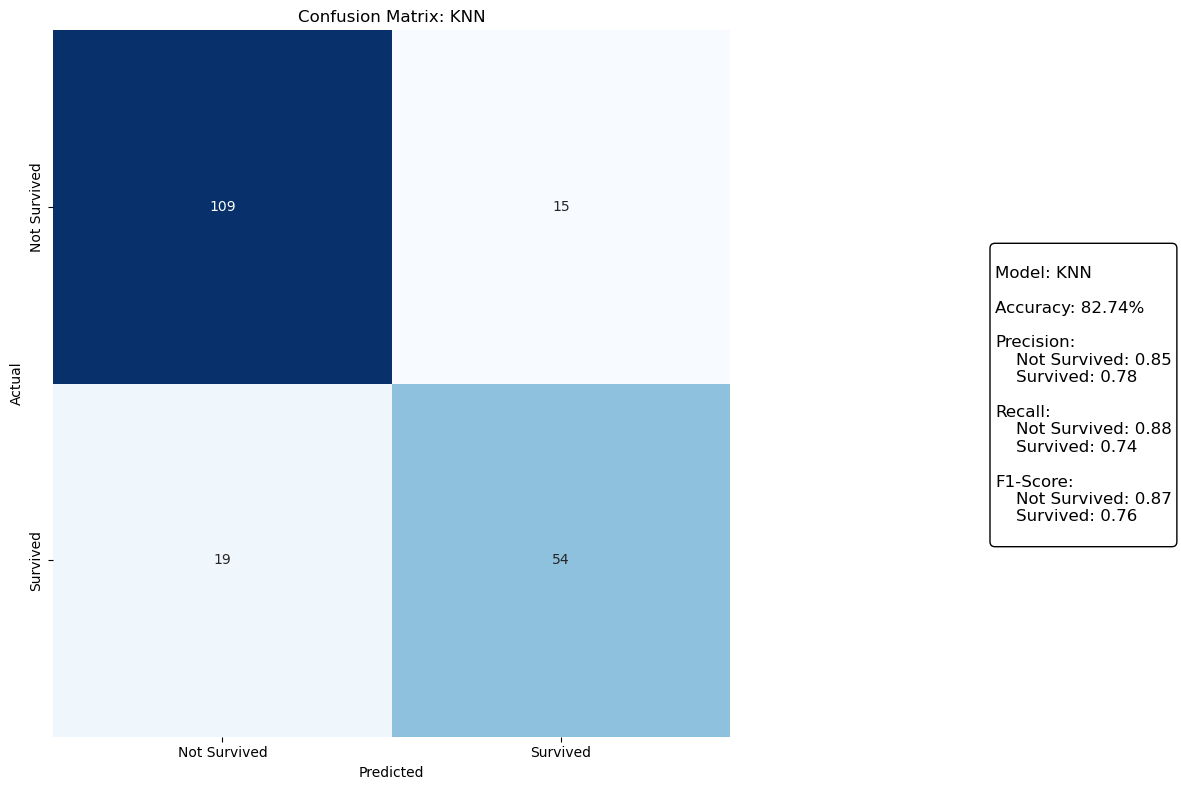

In [51]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]


accuracy = accuracy_score(y_val, y_pred) 
report_knn = classification_report(y_val, y_pred, target_names=labels, output_dict=True)


accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: KNN")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: KNN

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_knn['Not Survived']['precision']:.2f}
    Survived: {report_knn['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_knn['Not Survived']['recall']:.2f}
    Survived: {report_knn['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_knn['Not Survived']['f1-score']:.2f}
    Survived: {report_knn['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.show()


In [52]:
# Stochastic Gradient Descent

from sklearn.linear_model import SGDClassifier

sgd = SGDClassifier()
sgd.fit(x_train, y_train)
y_pred = sgd.predict(x_val)
acc_sgd = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_sgd)

68.53


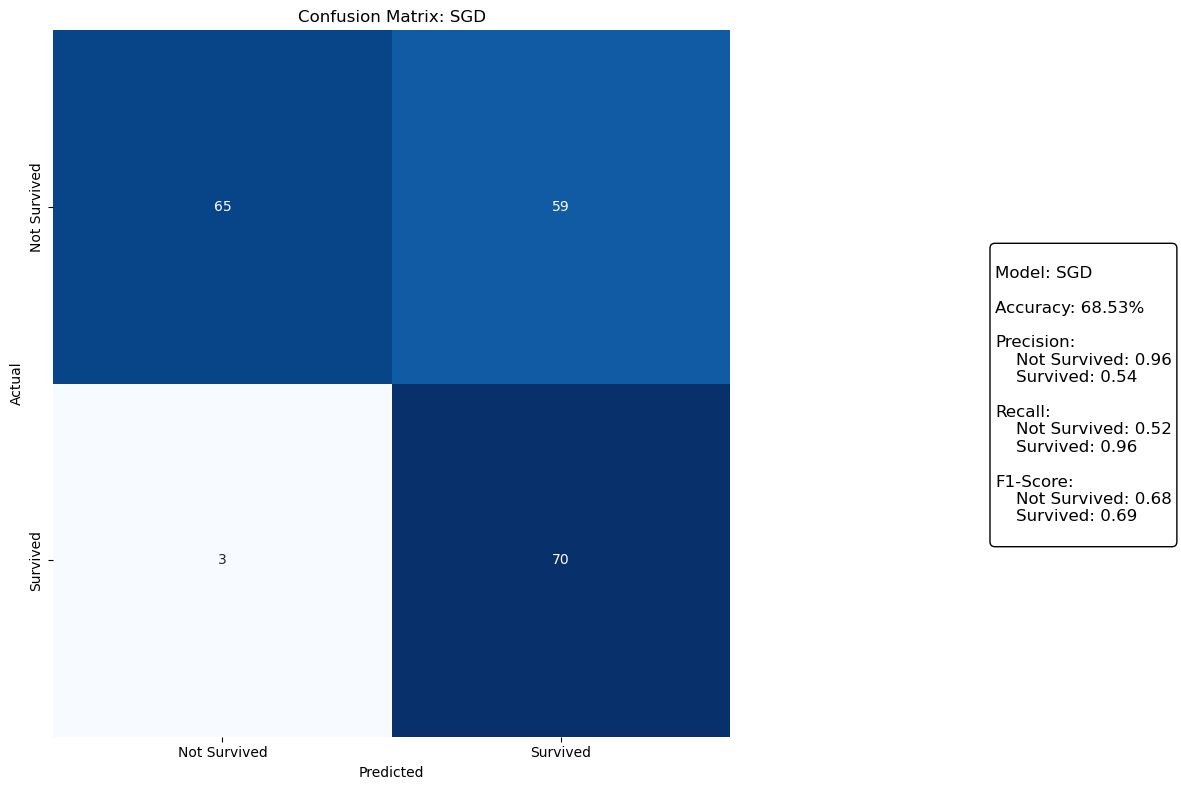

In [53]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]


accuracy = accuracy_score(y_val, y_pred)
report_sgd = classification_report(y_val, y_pred, target_names=labels, output_dict=True)


accuracy = round(accuracy * 100, 2)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: SGD")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: SGD

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_sgd['Not Survived']['precision']:.2f}
    Survived: {report_sgd['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_sgd['Not Survived']['recall']:.2f}
    Survived: {report_sgd['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_sgd['Not Survived']['f1-score']:.2f}
    Survived: {report_sgd['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1]) 
plt.show()



In [54]:
# Gradient Boosting Classifier

from sklearn.ensemble import GradientBoostingClassifier

gbk = GradientBoostingClassifier()
gbk.fit(x_train, y_train)
y_pred = gbk.predict(x_val)
acc_gbk = round(accuracy_score(y_pred, y_val) * 100, 2)
print(acc_gbk)

84.77


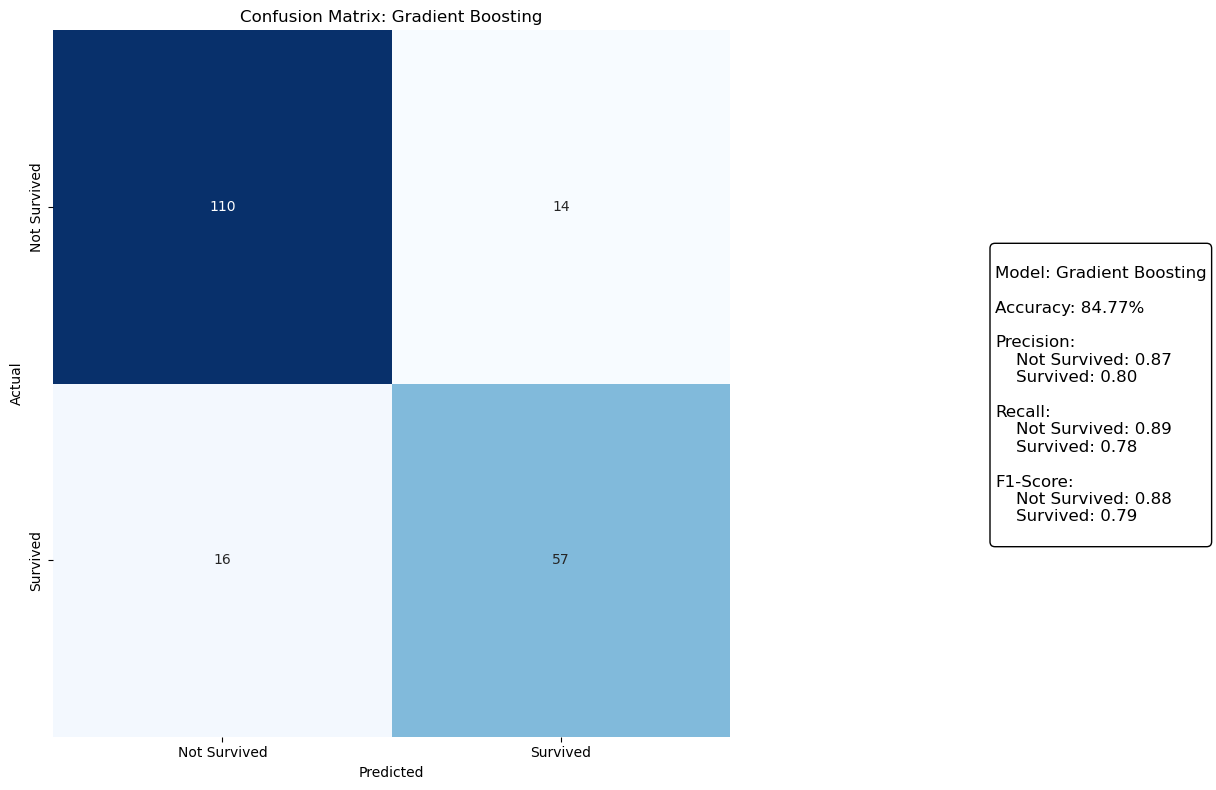

In [55]:
cm = confusion_matrix(y_val, y_pred)
labels = ["Not Survived", "Survived"]


accuracy = accuracy_score(y_val, y_pred) 
report_gbk = classification_report(y_val, y_pred, target_names=labels, output_dict=True)


accuracy = round(accuracy * 100, 2)


plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels, cbar=False)
plt.title("Confusion Matrix: Gradient Boosting")
plt.xlabel("Predicted")
plt.ylabel("Actual")


metrics_text = f"""
Model: Gradient Boosting

Accuracy: {accuracy:.2f}%

Precision:
    Not Survived: {report_gbk['Not Survived']['precision']:.2f}
    Survived: {report_gbk['Survived']['precision']:.2f}

Recall:
    Not Survived: {report_gbk['Not Survived']['recall']:.2f}
    Survived: {report_gbk['Survived']['recall']:.2f}

F1-Score:
    Not Survived: {report_gbk['Not Survived']['f1-score']:.2f}
    Survived: {report_gbk['Survived']['f1-score']:.2f}
"""
plt.gcf().text(1, 0.5, metrics_text, fontsize=12, verticalalignment="center", bbox=dict(boxstyle="round", facecolor="white", edgecolor="black"))

plt.tight_layout(rect=[0, 0, 0.75, 1])
plt.show()

In [56]:
model_metrics = [
    {'Model': 'Support Vector Machines', 
     'Accuracy': acc_svc, 
     'Precision': report_svc['Survived']['precision'], 
     'Recall': report_svc['Survived']['recall'], 
     'F1-Score': report_svc['Survived']['f1-score']},
    
    {'Model': 'KNN', 
     'Accuracy': acc_knn, 
     'Precision': report_knn['Survived']['precision'], 
     'Recall': report_knn['Survived']['recall'], 
     'F1-Score': report_knn['Survived']['f1-score']},
    
    {'Model': 'Logistic Regression', 
     'Accuracy': acc_logreg, 
     'Precision': report_logreg['Survived']['precision'], 
     'Recall': report_logreg['Survived']['recall'], 
     'F1-Score': report_logreg['Survived']['f1-score']},
    
    {'Model': 'Random Forest', 
     'Accuracy': acc_randomforest, 
     'Precision': report_randomforest['Survived']['precision'], 
     'Recall': report_randomforest['Survived']['recall'], 
     'F1-Score': report_randomforest['Survived']['f1-score']},
    
    {'Model': 'Gaussian Naive Bayes', 
     'Accuracy': acc_gaussian, 
     'Precision': report_gaussian['Survived']['precision'], 
     'Recall': report_gaussian['Survived']['recall'], 
     'F1-Score': report_gaussian['Survived']['f1-score']},
    
    {'Model': 'Perceptron', 
     'Accuracy': acc_perceptron, 
     'Precision': report_perceptron['Survived']['precision'], 
     'Recall': report_perceptron['Survived']['recall'], 
     'F1-Score': report_perceptron['Survived']['f1-score']},
    
    {'Model': 'Linear SVC', 
     'Accuracy': acc_linear_svc, 
     'Precision': report_linear_svc['Survived']['precision'], 
     'Recall': report_linear_svc['Survived']['recall'], 
     'F1-Score': report_linear_svc['Survived']['f1-score']},
    
    {'Model': 'Decision Tree', 
     'Accuracy': acc_decisiontree, 
     'Precision': report_decisiontree['Survived']['precision'], 
     'Recall': report_decisiontree['Survived']['recall'], 
     'F1-Score': report_decisiontree['Survived']['f1-score']},
    
    {'Model': 'Stochastic Gradient Descent', 
     'Accuracy': acc_sgd, 
     'Precision': report_sgd['Survived']['precision'], 
     'Recall': report_sgd['Survived']['recall'], 
     'F1-Score': report_sgd['Survived']['f1-score']},
    
    {'Model': 'Gradient Boosting Classifier', 
     'Accuracy': acc_gbk, 
     'Precision': report_gbk['Survived']['precision'], 
     'Recall': report_gbk['Survived']['recall'], 
     'F1-Score': report_gbk['Survived']['f1-score']}
]


models_df = pd.DataFrame(model_metrics)

models_df = models_df.sort_values(by='Accuracy', ascending=False)

print(models_df)

                          Model  Accuracy  Precision    Recall  F1-Score
9  Gradient Boosting Classifier     84.77   0.802817  0.780822  0.791667
3                 Random Forest     84.26   0.776316  0.808219  0.791946
0       Support Vector Machines     82.74   0.767123  0.767123  0.767123
1                           KNN     82.74   0.782609  0.739726  0.760563
7                 Decision Tree     80.71   0.769231  0.684932  0.724638
2           Logistic Regression     79.70   0.708861  0.767123  0.736842
4          Gaussian Naive Bayes     78.68   0.656566  0.890411  0.755814
5                    Perceptron     78.68   0.682353  0.794521  0.734177
6                    Linear SVC     78.68   0.691358  0.767123  0.727273
8   Stochastic Gradient Descent     68.53   0.542636  0.958904  0.693069
